<a href="https://colab.research.google.com/github/Flor91/Data-Science/blob/master/Properati_Flor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Properati Grupo 5

## Autores
* Lautaro Chehin
* Alexia Aquino
* Agustin Silvestre
* Constanza Silvestre
* Florencia Silvestre


### El dataset

* operation: alquiler (rent) o venta (sell)
* property_type: tipo de propiedad (casa, departamento, ph, etcétera)
* place_with_parent_names: nombre del lugar donde se encuentra la propiedad según el publicador
* lat-lon: coordenadas concatenadas
* lat: latitud
* lon: longitud
* price: precio en la moneda especificada en currency
* currency: divisa en la que está expresada la publicación
* price_aprox_usd: precio aproximado en dólares estadounidenses
* surface_total_in_m2: superficie total (en metros cuadrados)
* surface_covered_in_m2: superficie cubierta (en metros cuadrados)
* price_usd_per_m2: precio por metro cuadrado en dólares (precio dólares / superficie)
* floor: número de piso (si corresponde)
* rooms: cantidad de ambientes
* expenses: expensas (si corresponde)
* barrio: barrio según cartografía oficial
* properati_url: url de la publicación en Properati

### Tareas
1. Limpieza del dataset:

  - Coti + Alexia: columnas de localizacion
  - Agus + Lautaro: Descripciones - sacar info
  - Flor: Limpiar columnas de precios [HECHO]
  - Flor: Completar lat, long  [HECHO]
  - Flor: Investigar datos externos para enriquecer datos de properati

2. Definir preguntas de negocio / datos a mostrar
3. Armar visualizaciones



## Carga del archivo desde Drive

In [1]:
# Instala libreria de python para poder conectarse de python a google drive
!pip install -U -q PyDrive

In [2]:
# Cuando corren esta celda por primera vez les va a primero tirar un link
# Hacen click en el link, se logean a sus cuentas de google
# Les va a aparecer un codigo parecido a este: 
# Pegan ese codigo en el espacio en blanco que les aparece en esta celda y le dan enter
# Con esto le dieron acceso al Python de este google colab a acceder a sus drives. 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Esto busca el archivo de properati compartido que esta en drive, y abre y lo guarda en memoria en un archivo llamado 'properati.csv'
drive_file_url = 'https://drive.google.com/file/d/15Ofxvl8CbGrq2BjwmE7GjRCMR_YixKb4/view?usp=sharing'
id = '15Ofxvl8CbGrq2BjwmE7GjRCMR_YixKb4'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('properati.csv')

## Importar y explorar datos

Importamos todas las librerias que vamos a necesitar

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Con esta opcion de pandas podemos ver todas las columnas cuando hacemos un pd.head()
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 5000)

# Con la siguiente opcion podemos ver los valores floats con solo 2 decimales (no necesitamos mas)
#pd.set_option("display.precision", 2)

In [5]:
# Leemos el csv como un dataframe de Pandas
data = pd.read_csv('properati.csv')

# Veamos nuestro dataframe
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


### Explorar y Analizar el data set

Veamos los tipos de datos de cada columna de nuestro data set, y la cantidad de nulos que contienen.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

Veamos informacion sobre los valores numericos de nuestro dataset:

In [7]:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


Veamos los tipos de operaciones que tienen nuestro dataset.
Vemos que son todos de tipo sell, por lo tanto esta columna es redundante y voy a eliminarla en la etapa de limpieza de datos.

In [8]:
data.operation.value_counts()

sell    121220
Name: operation, dtype: int64

Veamos los tipos de propiedades que hay en mi dataset:
- Departamentos
- PH
- Casas
- Tiendas

In [9]:
data.property_type.value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

Veamos informacion sobre las columnas de tipo object de nuestro dataset:

- Vemos que al igual que operation, la columna country_name es siempre Argentina, por lo que tambien puedo eliminarla.


In [10]:
data.describe(include=np.object)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,currency,properati_url,description,title,image_thumbnail
count,121220,121220,121197,121220,121220,121220,69670,100809,121220,121218,121220,118108
unique,1,4,1060,1164,1,28,47203,4,121220,104055,72705,114389
top,sell,apartment,Córdoba,|Argentina|Santa Fe|Rosario|,Argentina,Capital Federal,"-34.4026444,-58.6684776",USD,http://www.properati.com.ar/1axli_venta_depart...,AVISO LEGAL: Las descripciones arquitectónicas...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/yyMiu8BHQI9KXC...
freq,121220,71065,9254,8504,121220,32316,312,87587,1,358,4855,255


In [11]:
data.place_name.value_counts()

Córdoba                            9254
Rosario                            8504
Mar del Plata                      6534
Tigre                              3324
Nordelta                           3315
                                   ... 
Pinto                                 1
Las Tapias                            1
Barrio Cerrado "Las Marías"           1
Barrio Cerrado "Las Araucarias"       1
Villa Centenario                      1
Name: place_name, Length: 1060, dtype: int64

In [12]:
data.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [13]:
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [14]:
data.title.value_counts()

DEPARTAMENTO EN VENTA                                                                           4855
CASA EN VENTA                                                                                   2677
Departamento - Nueva Cordoba                                                                    1003
PH EN VENTA                                                                                      921
Departamento - Centro                                                                            685
                                                                                                ... 
PH APTO CRÉDITO EN JOSÉ C. PAZ                                                                     1
ITUZAINGO CENTRO 300 Ms Estacion Sobre 2 Lotes 5 Ambientes Quincho Pileta Zona residencial         1
Departamento 60m² con Plantas en Gardel, Carlos 1500, Vicente López, Olivos, por U$S 137.000       1
2 ambientes. Excelente ubicación. Apto profesional.                                        

## Limpieza

In [15]:
data.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

### Columnas que me interesa quedarme

**operation** es siempre sell

'property_type', 'description', 'title',

Solo si hacemos algo de visualizacion con mapas:
 'geonames_id', 'lat-lon', 'lat', 'lon', 

Sobre lugar:
'place_name', 'place_with_parent_names', 'country_name', 'state_name',

Sobre precios:
'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',  'expenses', 

Superficie, habitaciones
'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms',

A descartar
'properati_url', 'image_thumbnail'

In [55]:
# To clean
data_about = ['property_type', 'title', 'description'] 
data_geo = ['geonames_id', 'lat-lon', 'lat', 'lon']
data_loc = ['state_name', 'place_name', 'place_with_parent_names'] 
data_price = ['price_aprox_usd', 'price_usd_per_m2', 'expenses']
data_sup = ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms']

data_cols = data_about + data_loc + data_price + data_sup + data_geo

properati = data[data_cols]

In [56]:
# Fill empty floor with 0

properati['floor'] = properati.floor.fillna(0)
properati.floor.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [57]:
properati['property_type'] = pd.Categorical(properati['property_type'])
properati['property_type'].dtype

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


CategoricalDtype(categories=['PH', 'apartment', 'house', 'store'], ordered=False)

### Limpieza de precios

In [58]:
data_price_columns = ['price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2', 'expenses']
data_prices = data[data_price_columns]
data_prices.head()

,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,expenses
0,1093959.0,62000.0,1127.272727,NaN
1,2646675.0,150000.0,NaN,NaN
2,1270404.0,72000.0,1309.090909,NaN
3,1676227.5,95000.0,NaN,NaN
4,1129248.0,64000.0,1828.571429,NaN


In [59]:
data_prices.isnull().sum()

price_aprox_local_currency     20410
price_aprox_usd                20410
price_usd_per_m2               52603
expenses                      106958
dtype: int64

In [60]:
# Filtro los que tienen precio nulo, y veo del resto de las columnas cuantos nulos hay
data_prices.loc[data_prices.price_aprox_usd.isnull(),:].isnull().sum()

# Aca puedo ver que los que no tienen precio no tienen nada del resto. 
# Si quiero rellenar cualquiera de estas columnas (excepto algunos casos de precio usd por m2) tengo que hacerlo por inferencia de otros campos

price_aprox_local_currency    20410
price_aprox_usd               20410
price_usd_per_m2              20410
expenses                      19394
dtype: int64

In [61]:
# Quiero ver el tipo de cambio que esta usando este dataset para intentar inferir el año

data_prices['cambio'] = data_prices['price_aprox_local_currency'] / data_prices['price_aprox_usd']

data_prices.cambio.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


17.644499988448175

Un tipo de cambio de 17.6445 nos indica que el dataset es de la segunda mitad de año de **2017**.


In [62]:
data[['price_usd_per_m2', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms']].corr()

,price_usd_per_m2,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms
price_usd_per_m2,1.000000,0.311328,-0.047708,-0.050408,0.158965,-0.173599
price_aprox_usd,0.311328,1.000000,0.301137,0.165531,-0.003029,0.182916
surface_total_in_m2,-0.047708,0.301137,1.000000,0.195453,0.013522,0.106810
surface_covered_in_m2,-0.050408,0.165531,0.195453,1.000000,-0.000677,0.162912
floor,0.158965,-0.003029,0.013522,-0.000677,1.000000,0.065190
rooms,-0.173599,0.182916,0.106810,0.162912,0.065190,1.000000


### Limpieza datos de geolocalizacion


Vamos a quitar los avisos que no tienen precio en dolares por m2 ya que no hay consideramos que haya una correlaccion lo bastante fuerte con otra columna para poder interpolar este valor sin ensuciar nuestro dataset.

In [63]:
properati.dropna(subset = ['price_usd_per_m2'], inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
properati.head()

,property_type,title,description,state_name,place_name,place_with_parent_names,price_aprox_usd,price_usd_per_m2,expenses,surface_total_in_m2,surface_covered_in_m2,floor,rooms,geonames_id,lat-lon,lat,lon
0,PH,2 AMB TIPO CASA SIN EXPENSAS EN PB,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",Capital Federal,Mataderos,|Argentina|Capital Federal|Mataderos|,62000.0,1127.272727,NaN,55.0,40.0,0.0,NaN,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839
2,apartment,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,Capital Federal,Mataderos,|Argentina|Capital Federal|Mataderos|,72000.0,1309.090909,NaN,55.0,55.0,0.0,NaN,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982
4,apartment,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,Buenos Aires Costa Atlántica,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,1828.571429,NaN,35.0,35.0,0.0,NaN,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447
6,PH,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,Bs.As. G.B.A. Zona Norte,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.0,1226.415094,NaN,106.0,78.0,0.0,NaN,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782
7,apartment,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,Capital Federal,Belgrano,|Argentina|Capital Federal|Belgrano|,138000.0,3066.666667,NaN,45.0,40.0,0.0,NaN,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362


In [65]:
properati['place_with_parent_names'].isnull().sum()

0

In [66]:
properati[data_geo].isnull().sum()

geonames_id    11696
lat-lon        28667
lat            28667
lon            28667
dtype: int64

In [67]:
properati.geonames_id.value_counts()

3430863.0    4063
3838574.0    3520
3430234.0    2283
3436077.0    2127
3435874.0    1678
             ... 
3865485.0       1
3865385.0       1
3864878.0       1
3843788.0       1
3853510.0       1
Name: geonames_id, Length: 470, dtype: int64

In [68]:
properati['geonames_id'] = properati.geonames_id.interpolate()

properati.geonames_id.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3430863.00    4134
3838574.00    3597
3430234.00    2335
3436077.00    2152
3427753.00    1880
              ... 
3431719.00       1
3431727.25       1
3431701.50       1
3431696.00       1
3434719.50       1
Name: geonames_id, Length: 6637, dtype: int64

In [69]:
properati.lat.describe()

count    39950.000000
mean       -34.846551
std          1.691310
min        -54.819736
25%        -34.652095
50%        -34.598832
75%        -34.532969
max        -23.137164
Name: lat, dtype: float64

In [70]:
properati['lat'] = properati.groupby('place_with_parent_names')['lat'].apply(lambda g: g.interpolate('index'))
properati['lat'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    67783.000000
mean       -34.605957
std          1.687870
min        -54.819736
25%        -34.645004
50%        -34.588420
75%        -34.444033
max        -23.137164
Name: lat, dtype: float64

In [71]:
properati.lon.describe()

count    39950.000000
mean       -58.837329
std          1.733245
min        -71.663515
25%        -58.632187
50%        -58.457591
75%        -58.391419
max        -54.556127
Name: lon, dtype: float64

In [72]:
properati['lon'] = properati.groupby('place_with_parent_names')['lon'].apply(lambda g: g.interpolate('index'))
properati['lon'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    67783.000000
mean       -59.003396
std          1.886102
min        -71.663515
25%        -58.666507
50%        -58.482362
75%        -58.403280
max        -54.556127
Name: lon, dtype: float64

In [73]:
properati['lon'] = properati.groupby('place_name')['lon'].apply(lambda g: g.interpolate('index'))
properati['lat'] = properati.groupby('place_name')['lat'].apply(lambda g: g.interpolate('index'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
properati[data_geo].isnull().sum()

geonames_id        0
lat-lon        28667
lat              606
lon              606
dtype: int64

In [75]:
properati.drop('lat-lon', axis=1, inplace=True)
properati.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(68617, 16)

In [76]:
properati.head(3)

,property_type,title,description,state_name,place_name,place_with_parent_names,price_aprox_usd,price_usd_per_m2,expenses,surface_total_in_m2,surface_covered_in_m2,floor,rooms,geonames_id,lat,lon
0,PH,2 AMB TIPO CASA SIN EXPENSAS EN PB,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",Capital Federal,Mataderos,|Argentina|Capital Federal|Mataderos|,62000.0,1127.272727,NaN,55.0,40.0,0.0,NaN,3430787.0,-34.661824,-58.508839
2,apartment,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,Capital Federal,Mataderos,|Argentina|Capital Federal|Mataderos|,72000.0,1309.090909,NaN,55.0,55.0,0.0,NaN,3430787.0,-34.652262,-58.522982
4,apartment,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,Buenos Aires Costa Atlántica,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,1828.571429,NaN,35.0,35.0,0.0,NaN,3435548.0,-38.002626,-57.549447


## Analisis de Datos

Veamos la cantidad de propiedades por tipo de propiedad y por barrio, y luego veamos la distribucion de precios por m2 en usd usando groupby.

In [91]:
group_cantidad = properati.groupby(['property_type', 'state_name'])['title'].count().sort_values(ascending=False)
group_cantidad.head(15)

property_type  state_name                  
apartment      Capital Federal                 19896
house          Bs.As. G.B.A. Zona Norte         9081
apartment      Bs.As. G.B.A. Zona Norte         7343
               Buenos Aires Costa Atlántica     4136
               Santa Fe                         3276
               Bs.As. G.B.A. Zona Sur           2946
house          Bs.As. G.B.A. Zona Sur           2622
apartment      Córdoba                          2426
house          Bs.As. G.B.A. Zona Oeste         2282
apartment      Bs.As. G.B.A. Zona Oeste         1752
house          Buenos Aires Costa Atlántica     1713
               Capital Federal                  1357
PH             Capital Federal                  1266
house          Córdoba                          1080
store          Capital Federal                   915
Name: title, dtype: int64

In [92]:
group_precios = properati.groupby(['property_type', 'state_name'])['price_usd_per_m2'].mean().sort_values(ascending=False)
group_precios.head(15)

property_type  state_name                  
apartment      Capital Federal                 3324.464870
               San Juan                        3191.489362
store          Santa Fe                        3002.901146
apartment      Salta                           2987.691166
store          Capital Federal                 2899.667204
apartment      Río Negro                       2627.957903
               Bs.As. G.B.A. Zona Norte        2539.871735
               Santa Fe                        2391.993013
PH             Neuquén                         2313.924378
house          Salta                           2128.169804
apartment      Chubut                          2002.694843
               Mendoza                         1966.691498
               Buenos Aires Costa Atlántica    1958.838430
               Corrientes                      1933.717616
               Neuquén                         1894.646765
Name: price_usd_per_m2, dtype: float64

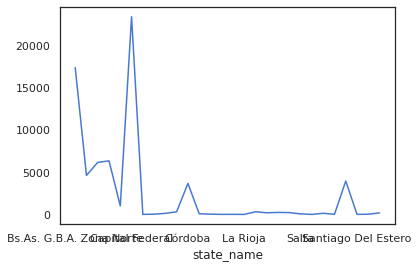

In [111]:
%matplotlib inline
properati.groupby(['state_name'])['price_usd_per_m2'].count().plot()

Usemos pivot_tables para analizar el dataset

In [103]:
properati_pivot = pd.pivot_table(properati, values=['price_aprox_usd', 'price_usd_per_m2', 'expenses', 'surface_covered_in_m2', 'surface_total_in_m2'], columns='property_type', index=['state_name'], aggfunc=('mean'), )
properati_pivot

expenses                               \
property_type                          PH      apartment         house   
state_name                                                               
Bs.As. G.B.A. Zona Norte       625.702703    3027.289782   5951.455479   
Bs.As. G.B.A. Zona Oeste       270.851852    1828.487113   2765.542169   
Bs.As. G.B.A. Zona Sur         496.814815    1508.886968   4143.767908   
Buenos Aires Costa Atlántica   718.571429    1885.633562   3120.000000   
Buenos Aires Interior          800.000000    1057.742857   4242.000000   
Capital Federal                961.994083    7062.736889   3070.100000   
Catamarca                             NaN            NaN           NaN   
Chaco                                 NaN    2100.000000           NaN   
Chubut                                NaN            NaN           NaN   
Corrientes                       1.000000     483.551724   3823.384615   
Córdoba                        977.909091    1597.088983  16452.910448   
Entre Ríos                            NaN     600.083333           NaN   
Formosa                               NaN     800.000000           NaN   
Jujuy                                 NaN            NaN           NaN   
La Pampa                              NaN     550.000000           NaN   
La Rioja                              NaN            NaN           NaN   
Mendoza                               NaN  118961.578947   5742.333333   
Misiones                              NaN            NaN           NaN   
Neuquén                               NaN    1250.000000      1.000000   
Río Negro                        1.000000    2112.500000           NaN   
Salta                                 NaN    4100.000000   2500.000000   
San Juan                              NaN            NaN           NaN   
San Luis                              NaN     425.000000   3800.000000   
Santa Cruz                            NaN            NaN           NaN   
Santa Fe                       150.000000    1304.271028  40366.833333   
Santiago Del Estero                   NaN            NaN      1.000000   
Tierra Del Fuego                      NaN            NaN    300.000000   
Tucumán                       1500.000000    1547.400000    800.000000   

                                          price_aprox_usd                 \
property_type                       store              PH      apartment   
state_name                                                                 
Bs.As. G.B.A. Zona Norte      1248.901639   138402.450096  207631.807193   
Bs.As. G.B.A. Zona Oeste      1042.933333   110384.588977   95764.692100   
Bs.As. G.B.A. Zona Sur        1143.676471   108290.269161  130876.970679   
Buenos Aires Costa Atlántica  2137.000000    89815.626167  121894.264882   
Buenos Aires Interior                 NaN   107194.224091  106792.973696   
Capital Federal               2735.000000   190510.284052  256444.212179   
Catamarca                             NaN             NaN            NaN   
Chaco                                 NaN             NaN  141708.974286   
Chubut                                NaN             NaN  169860.727647   
Corrientes                       1.000000   134057.142857  156854.491667   
Córdoba                       1774.227273   138360.004909  101184.181760   
Entre Ríos                       1.000000             NaN   95037.303714   
Formosa                               NaN             NaN   63463.367586   
Jujuy                                 NaN             NaN   84125.510000   
La Pampa                              NaN             NaN   72908.775000   
La Rioja                              NaN             NaN            NaN   
Mendoza                               NaN   247500.000000  154542.773103   
Misiones                              NaN    78517.140000   92810.854478   
Neuquén                               NaN   120675.955286  159095.875464   
Río Negro                        1.000000   144333.333333  272468.

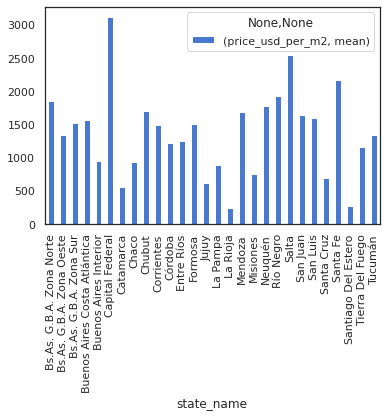

In [108]:
properati_price_pivot = pd.pivot_table(properati, values=['price_usd_per_m2'], index=['state_name'], aggfunc=('mean',), )
properati_price_pivot.plot(kind='bar')

In [79]:
# Filtro los que no tienen precio por m2
properati = properati.loc[properati.price_usd_per_m2.notnull(),:]

# Veamos como se distribuyen los precios por bins
(count, division)= np.histogram(properati.price_usd_per_m2)
bins = []
for i in range(0,len(division)-1):
    bins.append((division[i],division[i+1]))

bins = pd.DataFrame({'bin': bins,
                     'cantidad': count})
bins

,bin,cantidad
0,"(0.6, 20633.873333333326)",68202
1,"(20633.873333333326, 41267.14666666665)",388
2,"(41267.14666666665, 61900.41999999998)",22
3,"(61900.41999999998, 82533.69333333331)",2
4,"(82533.69333333331, 103166.96666666665)",0
5,"(103166.96666666665, 123800.23999999996)",1
6,"(123800.23999999996, 144433.5133333333)",0
7,"(144433.5133333333, 165066.78666666662)",0
8,"(165066.78666666662, 185700.05999999994)",1
9,"(185700.05999999994, 206333.33333333328)",1


In [80]:
properati_filtrados = properati[(properati.price_usd_per_m2 < properati.price_usd_per_m2.quantile(.95)) & (properati.price_usd_per_m2 > properati.price_usd_per_m2.quantile(.02))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


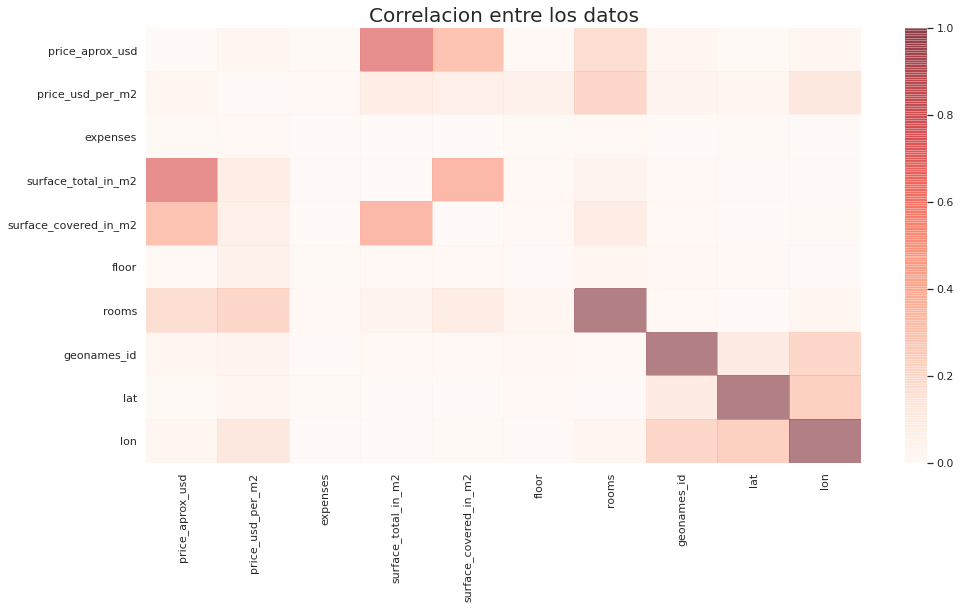

In [81]:
# Veamos la correlacion entre los datos
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = properati_filtrados.corr().abs()
cor.values[[np.arange(6)]*2] = 0
ax = plt.axes()
sns.heatmap(cor,cmap='Reds', alpha=0.5,ax=ax);
ax.set_title('Correlacion entre los datos', fontsize=20)
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


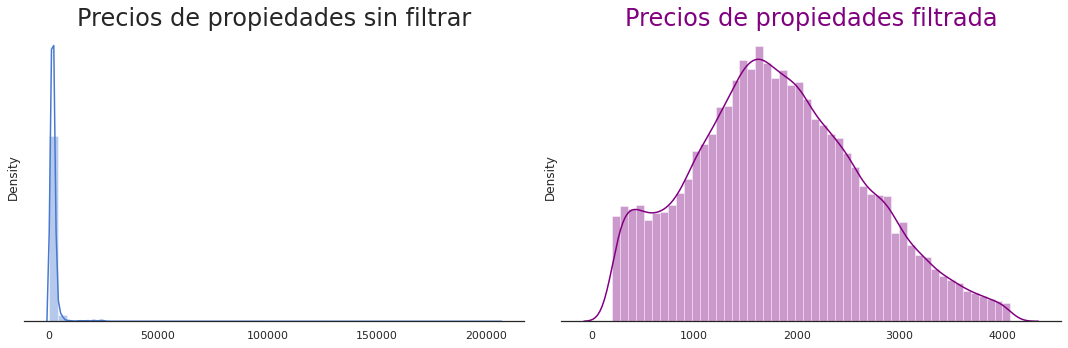

In [82]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.despine(left=True)


g1=sns.distplot(properati[['price_usd_per_m2']],ax=axes[0])
g1.axes.set_title('Precios de propiedades sin filtrar', fontsize=24)

g2 = sns.distplot(properati_filtrados[['price_usd_per_m2']], color="purple",ax=axes[1])
g2.axes.set_title('Precios de propiedades filtrada', fontsize=24,  color="purple")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

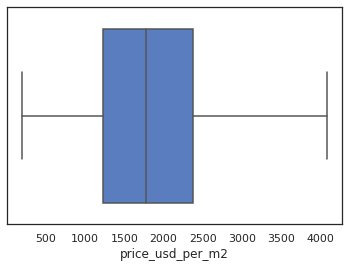

In [115]:
sns.boxplot(x = properati_filtrados['price_usd_per_m2'])

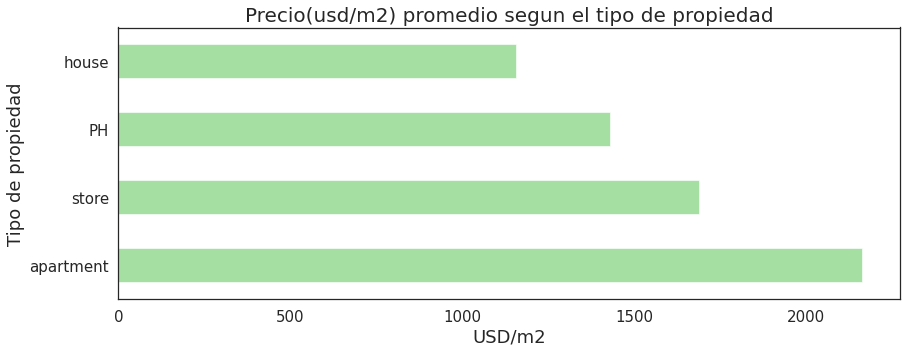

In [83]:
# Precios segun el tipo de propiedad

properati_type = properati_filtrados.groupby('property_type').mean()['price_usd_per_m2'].sort_values(ascending=False)
graph = properati_type.plot.barh(figsize=(14,5),fontsize=15, color='g', alpha=0.6)
graph.set_title("Precio(usd/m2) promedio segun el tipo de propiedad", fontsize=20)
graph.set_ylabel("Tipo de propiedad", fontsize=18)
graph.set_xlabel("USD/m2", fontsize=18)
plt.show()

In [84]:
properati_filtrados['state_name'].value_counts()

Capital Federal                 20707
Bs.As. G.B.A. Zona Norte        16673
Buenos Aires Costa Atlántica     6137
Bs.As. G.B.A. Zona Sur           5975
Bs.As. G.B.A. Zona Oeste         4426
Santa Fe                         3767
Córdoba                          3439
Buenos Aires Interior             856
Corrientes                        307
Mendoza                           294
Neuquén                           221
Río Negro                         200
Tucumán                           173
Misiones                          152
Chubut                            120
San Luis                          111
Entre Ríos                         71
Salta                              49
Formosa                            29
Tierra Del Fuego                   28
Chaco                              27
Santa Cruz                         11
La Pampa                           10
Catamarca                           5
Jujuy                               4
Santiago Del Estero                 2
San Juan    

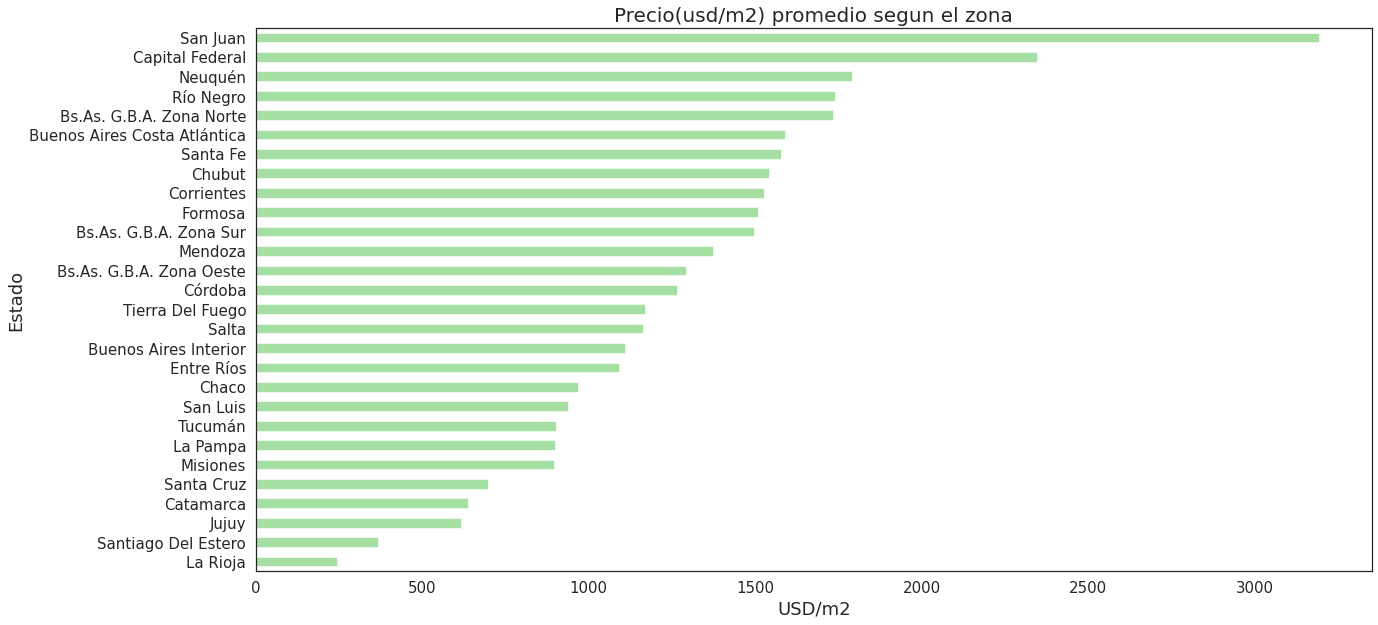

In [89]:
# Precios por state_name
properati_filtrados = properati_filtrados.loc[properati_filtrados.place_name.notnull(),:]

properati_type_state_name = properati_filtrados.groupby('state_name').mean()['price_usd_per_m2'].sort_values(ascending=True)
graph = properati_type_state_name.plot.barh(figsize=(20,10),fontsize=15, color='g', alpha=0.6)
graph.set_title("Precio(usd/m2) promedio segun el zona", fontsize=20)
graph.set_ylabel("Estado", fontsize=18)
graph.set_xlabel("USD/m2", fontsize=18)
plt.show()

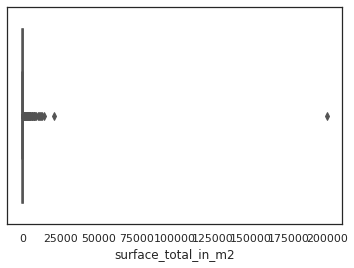

In [113]:
sns.boxplot(x = properati_filtrados['surface_total_in_m2'])

In [116]:
properati_filtrados = properati_filtrados[(properati.surface_total_in_m2 < properati.surface_total_in_m2.quantile(.95)) & (properati.surface_total_in_m2 > properati.surface_total_in_m2.quantile(.02))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


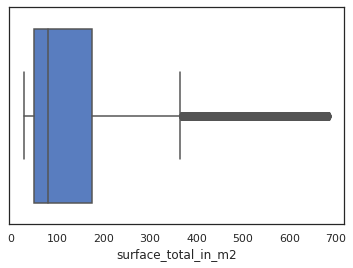

In [119]:
sns.boxplot(properati_filtrados['surface_total_in_m2'])

Veamos de este data set ya filtrado que procentaje de nulos tiene cada columna

In [124]:
properati_filtrados.isna().mean().round(4).sort_values(ascending=False) * 100

expenses                   83.21
rooms                      64.01
surface_covered_in_m2       7.64
lon                         0.81
lat                         0.81
geonames_id                 0.00
floor                       0.00
surface_total_in_m2         0.00
price_usd_per_m2            0.00
price_aprox_usd             0.00
place_with_parent_names     0.00
place_name                  0.00
state_name                  0.00
description                 0.00
title                       0.00
property_type               0.00
dtype: float64

In [125]:
print(f"El dataset final luego de la limpieza tiene {len(properati_filtrados)} observaciones")

El dataset final luego de la limpieza tiene 59707 observaciones


Veamos los barrios mas caros de capital Federal

In [132]:
properati_capital = properati_filtrados[properati_filtrados['state_name'] == 'Capital Federal']
properati_capital.shape

(19762, 16)

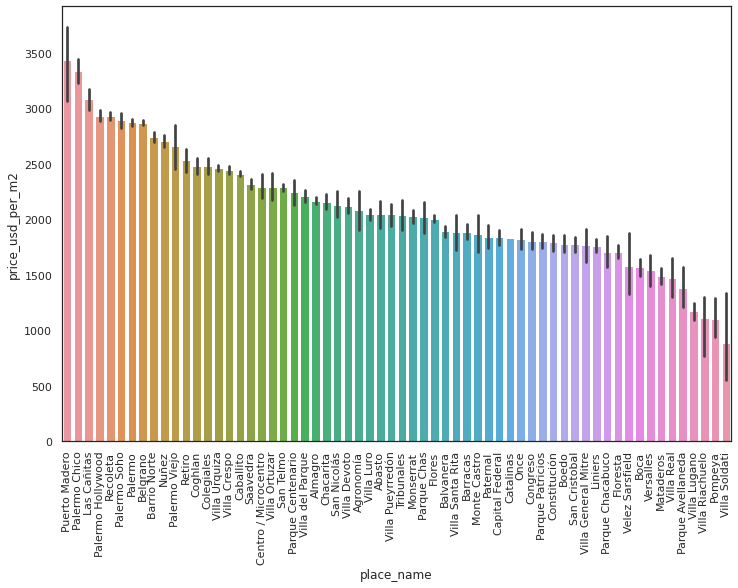

In [137]:
# Ajusto el tamaño de la figura para poder verla correctamente, y con xticks pongo los nombres de los barrios en vertical para poder leerlos
plt.rcParams['figure.figsize'] = (12,8)
plt.xticks(rotation = 90)

barrios = properati_capital.groupby('place_name').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="place_name", y="price_usd_per_m2", order=barrios, data=properati_capital)